<a href="https://colab.research.google.com/github/imaleaf03/bigdata-real_estate-model/blob/main/vietnam_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('propertyType.csv')

# Hiển thị thông tin cơ bản
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5330 entries, 0 to 5329
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   property_link     5330 non-null   object 
 1   title             5330 non-null   object 
 2   price             5317 non-null   float64
 3   area              5330 non-null   float64
 4   price_per_m2      5318 non-null   float64
 5   bedrooms          2588 non-null   float64
 6   agent_name        3815 non-null   object 
 7   description       5304 non-null   object 
 8   address           5319 non-null   object 
 9   project           1608 non-null   object 
 10  listingDate       5319 non-null   object 
 11  expiryDate        5319 non-null   object 
 12  posting_id        5319 non-null   float64
 13  bathrooms         2485 non-null   float64
 14  balcony           990 non-null    object 
 15  entry             3521 non-null   float64
 16  images            5320 non-null   object 


In [ ]:
missing_values_count = df.isnull().sum()
print("Số lượng giá trị bị thiếu ở mỗi cột:")
print(missing_values_count)

Số lượng giá trị bị thiếu ở mỗi cột:
property_link          0
title                  0
price                 13
area                   0
price_per_m2          12
bedrooms            2742
agent_name          1515
description           26
address               11
project             3722
listingDate           11
expiryDate            11
posting_id            11
bathrooms           2845
balcony             4340
entry               1809
images                10
latitude              11
longitude             11
legalStatus           51
furnishing          3268
houseOrientation    3020
frontage            1571
numberOfFloors      3140
listingType           11
propertyType           0
dtype: int64


In [ ]:
# Fill missing 'price' values where 'area' and 'price_per_m2' are available
df.loc[df['price'].isnull() & df['area'].notnull() & df['price_per_m2'].notnull(), 'price'] = df['area'] * df['price_per_m2']

In [ ]:
# Fill missing values with 0 for specific columns where propertyType is 'land'
df.loc[df['propertyType'] == 'land', ['bedrooms', 'bathrooms', 'numberOfFloors']] = df.loc[df['propertyType'] == 'land', ['bedrooms', 'bathrooms', 'numberOfFloors']].fillna(0)

# Fill missing values in 'furnishing' column with 'unfurnished' only for rows where propertyType is 'land'
df.loc[df['propertyType'] == 'land', 'furnishing'] = df.loc[df['propertyType'] == 'land', 'furnishing'].fillna('unfurnished')

In [ ]:
missing_price_rows = df[df['propertyType']=='project']
display(missing_price_rows)

,property_link,title,price,area,price_per_m2,bedrooms,agent_name,description,address,project,...,images,latitude,longitude,legalStatus,furnishing,houseOrientation,frontage,numberOfFloors,listingType,propertyType
2996,https://batdongsan.com.vn/ban-dat-nen-du-an-du...,"Cần bán lô đất biệt thự Diamond Bay, E11, 400m...",5.800000e+09,400.0,14.50,NaN,NaN,Cần bán lô đất biệt thự Diamond bay Mũi Né Pha...,"Dự án Diamond Bay Phan Thiết, Đường Võ Nguyên ...",Diamond Bay Phan Thiết,...,['https://file4.batdongsan.com.vn/resize/1275x...,10.945217,108.175137,red-book,NaN,southeast,17.0,NaN,premium,project
2997,https://batdongsan.com.vn/ban-dat-nen-du-an-du...,"Lô góc 201m2 đường 10,5m đối diện ĐH Phan Châu...",6.700000e+09,201.0,33.33,NaN,‎Phạm Bá Ngọc,"Thông tin lô đất:Diện tích: 10,5mx19,9m=201m²....","Dự án KĐT số 3 Điện Nam Điện Ngọc, Đường Ngô M...",Khu đô thị số 3 Điện Nam Điện Ngọc,...,['https://file4.batdongsan.com.vn/resize/1275x...,15.960098,108.257644,red-book,NaN,east,10.5,NaN,premium,project
2998,https://batdongsan.com.vn/ban-dat-nen-du-an-du...,100m2 - 5x20m gần bệnh viện Đa Khoa Thủ Thừa,1.250000e+09,100.0,12.50,NaN,‎Lê Thanh Tuấn,Chủ ngộp ký gửi lô đất gần bệnh viện Đa khoa T...,"Dự án Tây Nam Center Golden Land, Đường Hương ...",Tây Nam Center Golden Land,...,['https://file4.batdongsan.com.vn/resize/1275x...,10.604143,106.403259,red-book,NaN,NaN,5.0,NaN,premium,project
2999,https://batdongsan.com.vn/ban-dat-nen-du-an-du...,"Bán gấp lô đất nền dự án Lago Centro, 1,505 tỷ...",1.510000e+09,70.0,21.50,NaN,NaN,"Cần bán đất nền dự án tại Lago Centro, Tỉnh lộ...","Dự án Lago Centro, Đường Tỉnh lộ 830, Xã Lương...",Lago Centro,...,['https://file4.batdongsan.com.vn/resize/1275x...,10.754121,106.437681,red-book,NaN,south,NaN,NaN,premium,project
3000,https://batdongsan.com.vn/ban-dat-nen-du-an-du...,"Bán đất nền dự án tại The 826 EC, 2,65 tỷ, 80m...",2.650000e+09,80.0,33.12,NaN,‎Nguyễn Đình Hoàng,"Đất nền dự án tại The 826 EC, đường Long Hậu, ...","The 826 EC, Đường Long Hậu, Xã Long Hậu, Huyện...",The 826 EC,...,['https://file4.batdongsan.com.vn/resize/1275x...,10.640060,106.693149,red-book,NaN,NaN,NaN,NaN,premium,project
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3442,https://batdongsan.com.vn/ban-dat-nen-du-an-xa...,Bán lô biệt thự mặt tiền Sông Phước Giang KDC ...,1.850000e+09,205.0,9.02,NaN,‎Trần Kiệm,Chính chủ gửi bán lô biệt thự thuộc khu dân cư...,"Dự án Khu dân cư An Lộc Phát, Xã Nghĩa Hà, Quả...",Khu dân cư An Lộc Phát,...,['https://file4.batdongsan.com.vn/resize/1275x...,15.118027,108.871220,red-book,NaN,south,10.0,NaN,standard,project
3443,https://batdongsan.com.vn/ban-dat-nen-du-an-du...,Bán đất khu dân cư Sơn Tịnh 577 đường 28m hướn...,1.900000e+09,100.0,19.00,NaN,‎Trần Kiệm,Chính chủ gửi bán 01 lô đất khu dân cư Sơn Tịn...,"Dự án Khu dân cư Sơn Tịnh, Đường Võ Nguyên Giá...",Khu dân cư Sơn Tịnh - Quảng Ngãi,...,['https://i1.ytimg.com/vi/quVHnWHcgBY/maxresde...,15.150161,108.796169,red-book,NaN,east,5.0,NaN,standard,project
3444,https://batdongsan.com.vn/ban-dat-nen-du-an-du...,"Bán đất 4x16m, đường N1 KDC Icon Central p. Tâ...",3.000000e+09,64.0,46.88,NaN,NaN,"Vị trí đẹp, gần cổng dự án, không vướng cống h...","Dự án Icon Central, Đường N1, Phường Tân Đông ...",Khu dân cư Icon Central,...,['https://file4.batdongsan.com.vn/resize/1275x...,10.936441,106.747844,red-book,NaN,northeast,4.0,NaN,standard,project
3445,https://batdongsan.com.vn/ban-dat-nen-du-an-xa...,Hiếm bán lô đất 55m2 khu chung cư Phố Nối Hous...,3.800000e+09,55.0,69.09,NaN,NaN,Hiếm bán lô đất vị trí đẹp khu đô thị Phố Nối ...,"Dự án Phố Nối House, Xã Nghĩa Hiệp, Yên Mỹ, Hư...",Phố Nối House,...,['https://file4.batdongsan.com.vn/resize/1275x...,20.928992,106.057863,red-book,NaN,NaN,5.5,NaN,standard,project


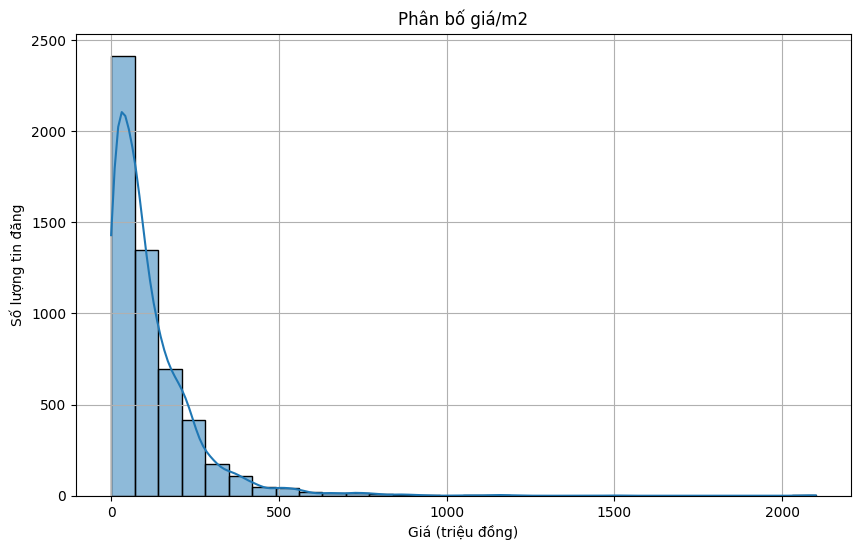

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['price_per_m2'], bins=30, kde=True)
plt.title('Phân bố giá/m2')
plt.xlabel('Giá (triệu đồng)')
plt.ylabel('Số lượng tin đăng')
plt.grid(True)
plt.show()


In [ ]:
# Define the property types to include
property_types_to_impute = ['land', 'project']

# Fill missing values with 0 for specific columns where propertyType is 'land' or 'project'
df.loc[df['propertyType'].isin(property_types_to_impute), ['bedrooms', 'bathrooms', 'numberOfFloors']] = df.loc[df['propertyType'].isin(property_types_to_impute), ['bedrooms', 'bathrooms', 'numberOfFloors']].fillna(0)

# Fill missing values in 'furnishing' column with 'unfurnished' only for rows where propertyType is 'land' or 'project'
df.loc[df['propertyType'].isin(property_types_to_impute), 'furnishing'] = df.loc[df['propertyType'].isin(property_types_to_impute), 'furnishing'].fillna('unfurnished')

In [ ]:
len(df['price_per_m2'])

5330

In [ ]:
len(df[df['price_per_m2'] > 600]['price_per_m2'])

59

In [ ]:
len(df[df['price_per_m2'] < 600]['price_per_m2'])

5259

In [ ]:
df = df[df['price_per_m2'] < 600]
print(len(df))

5259


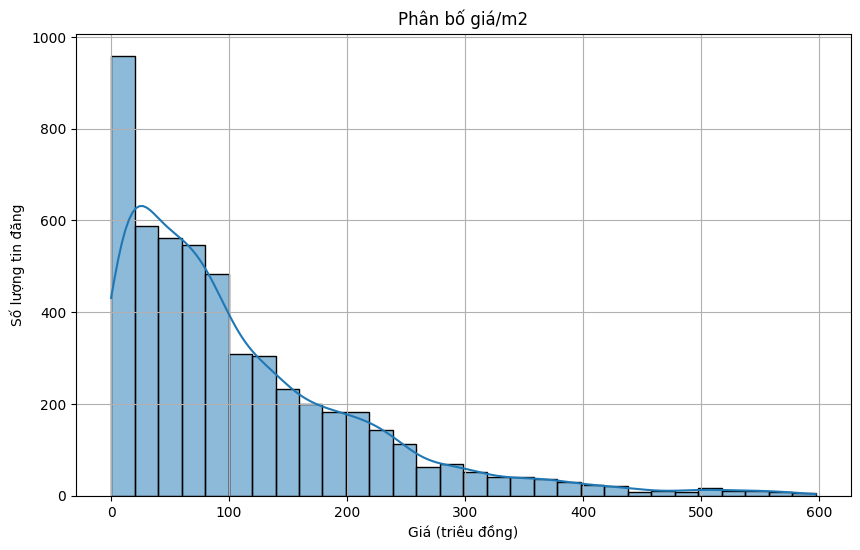

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['price_per_m2'], bins=30, kde=True)
plt.title('Phân bố giá/m2')
plt.xlabel('Giá (triêu đồng)')
plt.ylabel('Số lượng tin đăng')
plt.grid(True)
plt.show()


In [ ]:
import re

def remove_project_from_address(row):
    addr = str(row["address"])
    proj = str(row["project"]).strip()

    if proj and proj != "nan":
        if addr.startswith(proj):  # Nếu address bắt đầu bằng project
            addr = re.sub(rf"^{re.escape(proj)}\s*,\s*", "", addr)
    return addr

def clean_and_split(row):
    addr = str(row["address"])
    proj = str(row["project"]).strip()

    # Nếu address bắt đầu bằng project thì bỏ
    if proj and proj != "nan" and addr.startswith(proj):
        addr = re.sub(rf"^{re.escape(proj)}\s*,\s*", "", addr)

    parts = [p.strip() for p in addr.split(",") if p.strip()]

    result = {
        "house_number": np.nan,
        "street": np.nan,
        "ward": np.nan,
        "district": np.nan,
        "province": np.nan
    }

    if not parts:
        return pd.Series(result)

    # province = phần cuối
    result["province"] = parts[-1]

    # district = phần kế cuối (nếu có)
    if len(parts) >= 2:
        result["district"] = parts[-2]

    # street
    for p in parts:
        if p.startswith(("Đường", "Phố", "Hẻm")) or re.match(r"^\d+", p):
            result["street"] = p
            break

    # ward/commune
    for p in parts:
        if p.startswith(("Phường", "Xã", "Thị trấn")):
            result["ward"] = p
            break

    # house_number
    if re.match(r"^\d+", parts[0]):
        result["house_number"] = parts[0]

    return pd.Series(result)

df = df.join(df.apply(clean_and_split, axis=1))
df

,property_link,title,price,area,price_per_m2,bedrooms,agent_name,description,address,project,...,houseOrientation,frontage,numberOfFloors,listingType,propertyType,house_number,street,ward,district,province
0,https://batdongsan.com.vn/ban-dat-duong-nguyen...,"CC bán lô đất 2.617m2 mặt tiền Nguyễn Văn Bứa,...",3.402000e+10,2617.0,13.00,0.0,‎Nguyễn Trường Hoàng,"DT: 2.617m². 200m² TC.Vị trí cực đẹp, mặt tiền...","Đường Nguyễn Văn Bứa, Xã Xuân Thới Sơn, Hóc Mô...",NaN,...,NaN,NaN,0.0,feature,land,NaN,Đường Nguyễn Văn Bứa,Xã Xuân Thới Sơn,Hóc Môn,Hồ Chí Minh
1,https://batdongsan.com.vn/ban-dat-duong-dong-l...,Bán lô đất biệt thự 600m2 full thổ cư sau sân ...,2.280000e+10,600.0,38.00,0.0,‎Hằng Nguyễn,Chính chủ cần bán lô đất biệt thự cạnh sân bay...,"Đường Đồng Lai, Xã Quang Tiến, Sóc Sơn, Hà Nội",NaN,...,NaN,19.0,0.0,feature,land,NaN,Đường Đồng Lai,Xã Quang Tiến,Sóc Sơn,Hà Nội
2,https://batdongsan.com.vn/ban-dat-duong-song-h...,Bán đất trung tâm TP Cần Thơ 3 mặt tiền - sổ sẵn,4.000000e+11,4881.0,81.95,0.0,‎Tiên Tiên,Bán lô đất vàng trung tâm TP. Cần Thơ 3 mặt ti...,"Đường Sông Hậu, Phường Cái Khế, Ninh Kiều, Cần...",NaN,...,southeast,120.0,0.0,feature,land,NaN,Đường Sông Hậu,Phường Cái Khế,Ninh Kiều,Cần Thơ
3,https://batdongsan.com.vn/ban-dat-xa-giao-phon...,"Chính chủ bán đất Giao Thủy, Nam Định - đất vu...",2.050000e+09,83.5,24.55,0.0,‎Thăng Đặng Danh,"Hàng nét, đất Giao Phong, Quất Lâm gần 84m² MT...","Xã Giao Phong, Giao Thủy, Nam Định",NaN,...,NaN,4.6,0.0,premium,land,NaN,NaN,Xã Giao Phong,Giao Thủy,Nam Định
4,https://batdongsan.com.vn/ban-dat-duong-nguyen...,Chính chủ bán đất bán đất ngay trung tâm huyện...,7.000000e+09,232.1,30.16,0.0,‎Hoàng,Chính chủ bán đất bán đất ngay trung tâm huyện...,"Đường Nguyễn Kim Quy, Xã Phú Hội, Nhơn Trạch, ...",NaN,...,NaN,10.0,0.0,premium,land,NaN,Đường Nguyễn Kim Quy,Xã Phú Hội,Nhơn Trạch,Đồng Nai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5325,https://batdongsan.com.vn/ban-shophouse-nha-ph...,Nhà phố Eco City phân khu Milano,5.500000e+09,120.0,45.83,5.0,NaN,"Nhà phố Eco City Premia.Mặt tiền 6m rộng rãi, ...","Dự án Eco City Premia, Phường Tân An, Buôn Ma ...",EcoCity Premia,...,northwest,6.0,4.0,standard,other,NaN,NaN,Phường Tân An,Buôn Ma Thuột,Đắk Lắk
5326,https://batdongsan.com.vn/ban-shophouse-nha-ph...,Tôi cần bán căn shophouse 75m2 mặt công viên t...,2.400000e+10,75.0,320.00,5.0,NaN,Tôi cần bán căn shophouse 75m² mặt công viên t...,"Dự án The Manor Central Park, Đường Nguyễn Xiể...",The Manor Central Park,...,southeast,5.0,5.0,standard,other,NaN,Đường Nguyễn Xiển,Phường Đại Kim,Hoàng Mai,Hà Nội
5327,https://batdongsan.com.vn/ban-shophouse-nha-ph...,Chủ ngộp giảm ngay 450tr còn 2.05 tỷ căn shoph...,2.050000e+09,100.0,20.50,3.0,‎Lê Duy Quang,Chủ ngộp bank giảm ngay 450Tr còn 2.05 tỷ căn ...,"Thăng Long Central City, Đường DX 614, Thị trấ...",Thăng Long Central City,...,NaN,5.0,3.0,standard,other,NaN,Đường DX 614,Thị trấn Lai Uyên,Bàu Bàng,Bình Dương
5328,https://batdongsan.com.vn/ban-shophouse-nha-ph...,Chính chủ cần bán gấp shophouse Eco Charm Đà N...,5.100000e+09,105.0,48.57,NaN,‎Lưu Văn Hoàng,- Cần bán căn shophouse Eco Charm tại Liên Chi...,"Dự án Gami Eco Charm, Đường Nguyễn Lương Bằng,...",Gami Eco Charm,...,east,7.0,4.0,standard,other,NaN,Đường Nguyễn Lương Bằng,Phường Hòa Hiệp Nam,Liên Chiểu,Đà Nẵng


In [ ]:
print(len(df['ward'].unique()))

968


In [ ]:
missing_values_count = df.isnull().sum()
print("Số lượng giá trị bị thiếu ở mỗi cột sau khi điền một số giá trị:")
print(missing_values_count)

Số lượng giá trị bị thiếu ở mỗi cột sau khi điền một số giá trị:
property_link          0
title                  0
price                  0
area                   0
price_per_m2           0
bedrooms             481
agent_name          1502
description           26
address               11
project             3662
listingDate           11
expiryDate            11
posting_id            11
bathrooms            586
balcony             4292
entry               1795
images                10
latitude              11
longitude             11
legalStatus           51
furnishing          1005
houseOrientation    2979
frontage            1562
numberOfFloors       903
listingType           11
propertyType           0
house_number        5111
street              1213
ward                 126
district              11
province               0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [ ]:
columns_to_check = ['price', 'address', 'latitude', 'longitude',
                    'listingType', 'ward']
df.dropna(subset=columns_to_check, inplace=True)

print(f"Số lượng dòng sau khi loại bỏ giá trị thiếu: {len(df)}")

Số lượng dòng sau khi loại bỏ giá trị thiếu: 5133


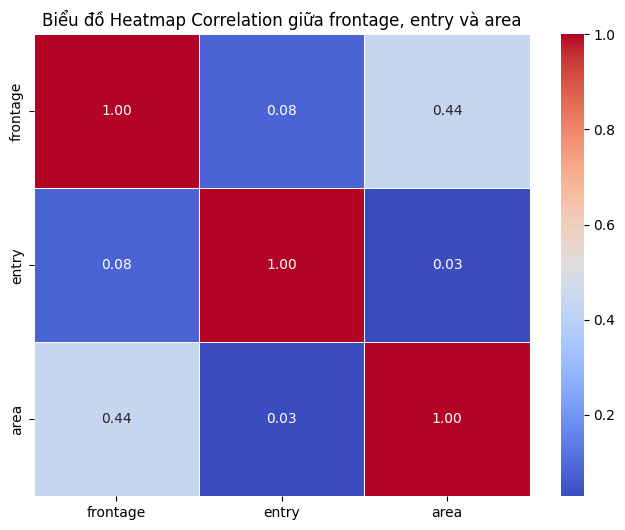

In [ ]:
# Select the relevant columns
correlation_columns = ['frontage', 'entry', 'area']
correlation_df = df[correlation_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Biểu đồ Heatmap Correlation giữa frontage, entry và area')
plt.show()

In [ ]:
# 1. Create a copy of the DataFrame
df_impute_test = df.copy()

# 2. Identify indices with non-missing 'frontage'
frontage_present_indices = df_impute_test[df_impute_test['frontage'].notnull()].index

# 3. Randomly select a subset of indices to simulate missing values
# Let's choose 20% of the non-missing values to simulate missingness
np.random.seed(42) # for reproducibility
frontage_missing_indices = np.random.choice(frontage_present_indices, size=int(len(frontage_present_indices) * 0.2), replace=False)

# 4. Create a copy of df_impute_test for evaluation
df_impute_eval = df_impute_test.copy()

# 5. Set 'frontage' values to NaN for the selected indices to simulate missing data
df_impute_eval.loc[frontage_missing_indices, 'frontage'] = np.nan

# 6. Store the original 'frontage' values for the simulated missing entries
original_frontage_values = df_impute_test.loc[frontage_missing_indices, 'frontage']

print(f"Original DataFrame length: {len(df)}")
print(f"Number of rows with non-missing frontage: {len(frontage_present_indices)}")
print(f"Number of rows with simulated missing frontage: {len(frontage_missing_indices)}")
print(f"DataFrame for imputation evaluation created with simulated missing values. Length: {len(df_impute_eval)}")
print(f"Original frontage values for simulated missing entries stored.")

Original DataFrame length: 5133
Number of rows with non-missing frontage: 3640
Number of rows with simulated missing frontage: 728
DataFrame for imputation evaluation created with simulated missing values. Length: 5133
Original frontage values for simulated missing entries stored.


In [ ]:
df_imputed_grouped_eval = df_impute_eval.copy()
num_area_groups = 30
df_impute_test['area_group'] = pd.qcut(df_impute_test['area'], q=num_area_groups, labels=False, duplicates='drop')

df_imputed_grouped_eval['area_group'] = pd.qcut(df_imputed_grouped_eval['area'], q=num_area_groups, labels=False, duplicates='drop')
median_frontage_by_area_group = df_impute_test.groupby('area_group')['frontage'].median()
df_imputed_grouped_eval['frontage'] = df_imputed_grouped_eval.apply(
    lambda row: median_frontage_by_area_group[row['area_group']] if pd.isnull(row['frontage']) and pd.notnull(row['area_group']) else row['frontage'],
    axis=1
)
print(f"Số lượng giá trị thiếu trong cột 'frontage' sau khi impute theo nhóm: {df_imputed_grouped_eval['frontage'].isnull().sum()}")

Số lượng giá trị thiếu trong cột 'frontage' sau khi impute theo nhóm: 0


In [ ]:
X = df.drop('price', axis=1)
y = df['price']
print("Shape of DataFrame before splitting:", df.shape) # Add print statement to verify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data splitting complete.")
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of DataFrame before splitting: (5133, 31)
Data splitting complete.
Shape of X_train (4106, 30)
Shape of X_test (1027, 30)
Shape of y_train: (4106,)
Shape of y_test: (1027,)


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder
import pandas as pd

class LabelEncoderMulti(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoders = {}

    def fit(self, X, y=None):
        # Đảm bảo X là DataFrame
        X = pd.DataFrame(X)
        for col in X.columns:
            le = LabelEncoder()
            le.fit(X[col].astype(str))
            self.encoders[col] = le
        return self

    def transform(self, X):
        X = pd.DataFrame(X)
        X_trans = X.copy()
        for col in X.columns:
            le = self.encoders[col]
            # Encode giá trị, nếu giá trị mới -> gán mã -1
            X_trans[col] = X[col].astype(str).map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)
        return X_trans

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns, target_column, smoothing=1):
        self.columns = columns
        self.target_column = target_column # Thêm tham số cho cột mục tiêu
        self.smoothing = smoothing
        self.target_means = {}
        self.global_mean = None

    def fit(self, X, y):
        # Kết hợp X và y để truy cập cột mục tiêu theo tên
        X_combined = pd.DataFrame(X).copy()
        # Đảm bảo chỉ sử dụng cột mục tiêu được chỉ định
        target_data = pd.Series(y, index=X_combined.index)

        self.global_mean = target_data.mean()

        for col in self.columns:
            if col not in X_combined.columns:
                continue

            # Calculate mean of target_column for each category in the training data
            # Đảm bảo chỉ nhóm các giá trị không phải NaN trong cột phân loại
            means = target_data.groupby(X_combined[col]).mean()

            # Calculate the number of observations for each category
            counts = X_combined[col].value_counts()

            # Apply smoothing
            smoothed_means = (means * counts + self.global_mean * self.smoothing) / (counts + self.smoothing)

            self.target_means[col] = smoothed_means

        return self

    def transform(self, X):
        X_transformed = pd.DataFrame(X).copy()

        for col in self.columns:
            if col not in X_transformed.columns:
                # Nếu cột không tồn tại trong X_transformed, bỏ qua hoặc xử lý theo cách khác
                continue

            # Map the learned target means to the column
            # Use global mean for categories not seen in training
            # Sử dụng get(col, {}) để tránh lỗi nếu col không có trong self.target_means
            X_transformed[col] = X_transformed[col].map(self.target_means.get(col, {})).fillna(self.global_mean)

        return X_transformed

    def fit_transform(self, X, y):
         # Fit và transform
        X_transformed = self.fit(X, y).transform(X)
        return X_transformed

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Define which columns to apply which transformation
# 'zip_code' will now be handled by the TargetEncoder
categorical_features_for_target_encoding = ['ward']
categorical_features_for_label_encoding = [ 'listingType', 'legalStatus', 'propertyType',
                                            'furnishing', 'district', 'province'] # Keep other categorical features if needed

# Modified numerical_features list to include only the specified columns
numerical_features = ['area', 'bedrooms', 'bathrooms', 'latitude', 'longitude',
                      'numberOfFloors', 'frontage']


# Columns to drop
#columns_to_drop = [ 'prev_sold_date', 'brokered_by']


# Custom transformer to ensure columns are numeric
class ToNumericTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = pd.DataFrame(X).copy()
        for col in X_transformed.columns:
            # Attempt to convert to numeric, coercing errors to NaN
            X_transformed[col] = pd.to_numeric(X_transformed[col], errors='coerce')
        return X_transformed

# Create transformers
numerical_transformer = Pipeline(steps=[
    ('to_numeric', ToNumericTransformer()), # Ensure columns are numeric
    ('imputer', SimpleImputer(strategy='median')), # Impute missing numerical values with the median
    ('scaler', StandardScaler()) # Scale numerical features
])

# Target Encoder for zip_code
target_encoder_zipcode = Pipeline(steps=[
    ('to_numeric', ToNumericTransformer()), # Ensure columns are numeric before imputation
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute missing before encoding if any
    ('target_encoder', TargetEncoder(columns=categorical_features_for_target_encoding, target_column='price_per_m2' , smoothing=10)) # Apply Target Encoding
])

# Label Encoder for other categorical features
label_encoder_other_cat = Pipeline(steps=[
    ('to_numeric', ToNumericTransformer()), # Ensure columns are numeric before imputation
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('label_encoder', LabelEncoderMulti()) # Using the custom LabelEncoderMulti
])


# Create a column transformer to apply different transformations
preprocessor_target_encoded = ColumnTransformer(
    transformers=[
        #('drop_cols', 'drop', columns_to_drop),
        ('num', numerical_transformer, numerical_features),
        ('zip_target', target_encoder_zipcode, categorical_features_for_target_encoding),
        ('other_cat_label', label_encoder_other_cat, categorical_features_for_label_encoding)
    ],
    remainder='drop' # Changed from 'passthrough' to 'drop'
)

print("Preprocessing pipeline with Target Encoding for zip_code updated with remainder='drop'.")

Preprocessing pipeline with Target Encoding for zip_code updated with remainder='drop'.


#AutoGluon

In [ ]:
pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Oct  2 10:42:05 UTC 2025
CPU Count:          2
Memory Avail:       11.50 GB / 12.67 GB (90.7%)
Disk Space Avail:   62.10 GB / 107.72 GB (57.7%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdou

(_ray_fit pid=2145) [1000]	valid_set's l1: 8.1662e+09


(_dystack pid=1653) 	-6373174478.9948	 = Validation score   (-mean_absolute_error)
(_dystack pid=1653) 	27.27s	 = Training   runtime
(_dystack pid=1653) 	0.22s	 = Validation runtime
(_dystack pid=1653) Fitting model: LightGBM_BAG_L1 ... Training model for up to 62.13s of the 109.73s of remaining time.
(_dystack pid=1653) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.11%)


(_ray_fit pid=2425) [1000]	valid_set's l1: 5.1747e+09
(_ray_fit pid=2518) [1000]	valid_set's l1: 5.20092e+09
(_ray_fit pid=2518) [2000]	valid_set's l1: 5.03473e+09


(_dystack pid=1653) 	-5938463252.6059	 = Validation score   (-mean_absolute_error)
(_dystack pid=1653) 	30.23s	 = Training   runtime
(_dystack pid=1653) 	0.65s	 = Validation runtime
(_dystack pid=1653) Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 27.78s of the 75.38s of remaining time.
(_dystack pid=1653) 	-6540941999.0252	 = Validation score   (-mean_absolute_error)
(_dystack pid=1653) 	8.8s	 = Training   runtime
(_dystack pid=1653) 	0.22s	 = Validation runtime
(_dystack pid=1653) Fitting model: CatBoost_BAG_L1 ... Training model for up to 18.65s of the 66.25s of remaining time.
(_dystack pid=1653) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=3.91%)
(_ray_fit pid=2679) 	Ran out of time, early stopping on iteration 124.
(_ray_fit pid=2777) 	Ran out of time, early stopping on iteration 279. [repeated 2x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable 

Mô hình benchmark AutoGluon đã huấn luyện hoàn tất!
Đánh giá mô hình benchmark AutoGluon:
MAE: 4,288,751,609
RMSE: 11,430,649,986
R2: 0.8324
MAPE: 0.3916


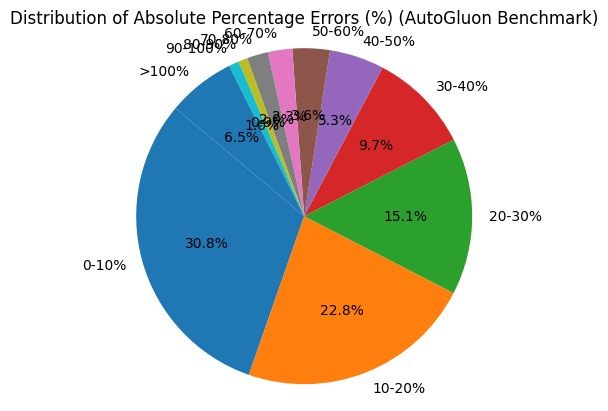

Distribution of Absolute Percentage Errors (AutoGluon Benchmark):
price
0-10%      316
10-20%     234
20-30%     155
30-40%     100
40-50%      54
50-60%      37
60-70%      24
70-80%      21
80-90%       9
90-100%     10
>100%       67
Name: count, dtype: int64

Percentage Distribution (AutoGluon Benchmark):
price
0-10%      30.769231
10-20%     22.784810
20-30%     15.092502
30-40%      9.737098
40-50%      5.258033
50-60%      3.602726
60-70%      2.336904
70-80%      2.044791
80-90%      0.876339
90-100%     0.973710
>100%       6.523856
Name: count, dtype: float64


,MAE,RMSE,R2,MAPE
AutoGluon Benchmark,4288751609,11430649986,0.8324,0.3916


Kết quả benchmark đã được thêm vào results_df và lưu file CSV!


In [ ]:
# Import thư viện AutoGluon
from autogluon.tabular import TabularPredictor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Chuẩn bị dữ liệu (kết hợp X_train và y_train)
train_data = pd.concat([X_train, y_train], axis=1)
# Remove duplicate 'state' column from the selected columns
selected_cols = ['listingType', 'legalStatus', 'propertyType','ward','furnishing', 'district', 'province',
                 'area', 'bedrooms', 'bathrooms', 'latitude', 'longitude','numberOfFloors', 'frontage','price']
train_data_selected = train_data[selected_cols].copy()

# Huấn luyện mô hình AutoGluon (benchmark tự động)
# Sử dụng eval_metric='mean_absolute_error' để phù hợp với dự đoán giá nhà
# presets='medium_quality' để nhanh (có thể thay bằng 'best_quality' cho hiệu suất cao hơn)
# time_limit=1800 giây (30 phút) - điều chỉnh nếu dữ liệu lớn
predictor = TabularPredictor(
    label='price',  # Tên cột target
    eval_metric='mean_absolute_error',  # Tối ưu MAE (tương tự MAPE trong notebook)
    path='autogluon_model'  # Thư mục lưu model
).fit(
    train_data=train_data_selected,
    presets='best_quality',  # Tự động thử RF, XGBoost, LightGBM, Neural Nets
    time_limit=600  # Giới hạn thời gian để tránh chạy lâu
)

print("Mô hình benchmark AutoGluon đã huấn luyện hoàn tất!")

# Dự đoán trên tập test (X_test)
y_pred_auto = predictor.predict(X_test)

# Đánh giá các chỉ số (giống các mô hình thủ công trong notebook)
mae_auto = mean_absolute_error(y_test, y_pred_auto)
rmse_auto = np.sqrt(mean_squared_error(y_test, y_pred_auto))
r2_auto = r2_score(y_test, y_pred_auto)
mape_auto = mean_absolute_percentage_error(y_test, y_pred_auto)

print("Đánh giá mô hình benchmark AutoGluon:")
print(f"MAE: {mae_auto:,.0f}")
print(f"RMSE: {rmse_auto:,.0f}")
print(f"R2: {r2_auto:.4f}")
print(f"MAPE: {mape_auto:.4f}")

# Vẽ phân phối lỗi phần trăm tuyệt đối (APE) - sao chép hàm từ notebook
def plot_percentage_error_distribution(model_name, y_test, y_pred):
    error_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf]
    error_labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%', '>100%']
    y_test_cleaned = y_test.replace(0, 1e-6)
    percentage_errors = np.abs((y_test - y_pred) / y_test_cleaned) * 100
    error_categories = pd.cut(percentage_errors, bins=error_bins, labels=error_labels, right=True, include_lowest=True)
    error_counts = error_categories.value_counts().sort_index()
    error_percentages = error_counts / error_counts.sum() * 100
    plt.pie(error_percentages, labels=error_percentages.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Absolute Percentage Errors (%) ({model_name})')
    plt.axis('equal')
    plt.show()
    print(f"Distribution of Absolute Percentage Errors ({model_name}):")
    print(error_counts)
    print(f"\nPercentage Distribution ({model_name}):")
    print(error_percentages)

plot_percentage_error_distribution('AutoGluon Benchmark', y_test, y_pred_auto)

# Tích hợp vào results_df (từ phần tổng hợp đánh giá trong notebook)
# Khởi tạo results nếu nó chưa tồn tại
if 'results' not in locals() and 'results' not in globals():
    results = {}

results['AutoGluon Benchmark'] = {
    'MAE': mae_auto,
    'RMSE': rmse_auto,
    'R2': r2_auto,
    'MAPE': mape_auto
}
# Create results_df if it doesn't exist or update it
if 'results_df' not in locals() and 'results_df' not in globals():
    results_df = pd.DataFrame(results).T
else:
    results_df.loc['AutoGluon Benchmark'] = results['AutoGluon Benchmark']

results_df['MAE'] = results_df['MAE'].map('{:.0f}'.format)
results_df['RMSE'] = results_df['RMSE'].map('{:.0f}'.format)
results_df['R2'] = results_df['R2'].map('{:.4f}'.format)
results_df['MAPE'] = results_df['MAPE'].map('{:.4f}'.format)
display(results_df)
results_df.to_csv('model_evaluation_results_with_autogluon.csv', index=True)

print("Kết quả benchmark đã được thêm vào results_df và lưu file CSV!")

#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create the Linear Regression model pipeline
# We combine the preprocessor with the Linear Regression model
model_lr = Pipeline(steps=[('preprocessor', preprocessor_target_encoded),
                           ('regressor', LinearRegression())])

# Train the model
model_lr.fit(X_train, y_train)

print("Linear Regression model trained successfully.")


Linear Regression model trained successfully.


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['ward']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['listingType' 'legalStatus' 'propertyType' 'furnishing' 'district'
 'province']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


In [ ]:
# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)

print(f"Linear Regression Model Evaluation:")
print(f"Linear Regression Model MAPE: {mape_lr}")
print(f"Linear Regression Model MAE: {mae_lr:.2f}")
print(f"Linear Regression Model RMSE: {rmse_lr:.2f}")
print(f"Linear Regression Model R2: {r2_lr:.4f}")

Linear Regression Model Evaluation:
Linear Regression Model MAPE: 1.949061452576505
Linear Regression Model MAE: 12484983360.02
Linear Regression Model RMSE: 27948684973.93
Linear Regression Model R2: -0.0021


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['ward']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['listingType' 'legalStatus' 'propertyType' 'furnishing' 'district'
 'province']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appro

#Random Forest

In [ ]:
# Create the Random Forest model pipeline
# We combine the preprocessor with the Random Forest Regressor model
model_rf = Pipeline(steps=[('preprocessor', preprocessor_target_encoded),
                           ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))])

# Train the model
model_rf.fit(X_train, y_train)

print("Random Forest model trained successfully.")

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['ward']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['listingType' 'legalStatus' 'propertyType' 'furnishing' 'district'
 'province']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


Random Forest model trained successfully.


In [ ]:
# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

print(f"Random Forest Model Evaluation:")
print(f"Random Forest Model MAPE: {mape_rf}")
print(f"Random Forest Model MAE: {mae_rf:.2f}")
print(f"Random Forest Model RMSE: {rmse_rf:.2f}")
print(f"Random Forest Model R2: {r2_rf:.4f}")

Random Forest Model Evaluation:
Random Forest Model MAPE: 0.8165424947001234
Random Forest Model MAE: 6349095177.99
Random Forest Model RMSE: 17051316808.61
Random Forest Model R2: 0.6270


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['ward']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['listingType' 'legalStatus' 'propertyType' 'furnishing' 'district'
 'province']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appro

#Boosting (loss function mặc định)

In [ ]:
import xgboost as xgb

# Create the XGBoost model pipeline
# We combine the preprocessor with the XGBoost Regressor model
model_xgb = Pipeline(steps=[('preprocessor', preprocessor_target_encoded),
                            ('regressor', xgb.XGBRegressor(objective='reg:squarederror',
                                                            n_estimators=100,
                                                            learning_rate=0.1,
                                                            max_depth=5,
                                                            random_state=42,
                                                            n_jobs=-1))])

# Train the model
model_xgb.fit(X_train, y_train)

print("XGBoost model trained successfully.")

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['ward']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['listingType' 'legalStatus' 'propertyType' 'furnishing' 'district'
 'province']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


XGBoost model trained successfully.


In [ ]:
# Make predictions on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print(f"XGBoost Model Evaluation:")
print(f"XGBoost Model MAPE: {mape_xgb}")
print(f"XGBoost Model MAE: {mae_xgb:.2f}")
print(f"XGBoost Model RMSE: {rmse_xgb:.2f}")
print(f"XGBoost Model R2: {r2_xgb:.4f}")

XGBoost Model Evaluation:
XGBoost Model MAPE: 0.9663081221124976
XGBoost Model MAE: 6710985014.60
XGBoost Model RMSE: 15439814051.80
XGBoost Model R2: 0.6942


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['ward']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['listingType' 'legalStatus' 'propertyType' 'furnishing' 'district'
 'province']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appro

In [ ]:
!pip install lightgbm catboost

In [ ]:
import lightgbm as lgb

# Create the LightGBM model pipeline
# We combine the preprocessor with the LightGBM Regressor model
model_lgb = Pipeline(steps=[('preprocessor', preprocessor_target_encoded),
                             ('regressor', lgb.LGBMRegressor(random_state=42, n_jobs=-1))])

# Train the model
model_lgb.fit(X_train, y_train)

print("LightGBM model trained successfully.")

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['ward']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['listingType' 'legalStatus' 'propertyType' 'furnishing' 'district'
 'province']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013860 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1005
[LightGBM] [Info] Number of data points in the train set: 4106, number of used features: 7
[LightGBM] [Info] Start training from score 15927313196.490501
LightGBM model trained successfully.


In [ ]:
# Make predictions on the test set
y_pred_lgb = model_lgb.predict(X_test)

# Evaluate the model
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
r2_lgb = r2_score(y_test, y_pred_lgb)
mape_lgb = mean_absolute_percentage_error(y_test, y_pred_lgb)

print(f"LightGBM Model Evaluation:")
print(f"LightGBM Model MAPE: {mape_lgb}")
print(f"LightGBM Model MAE: {mae_lgb:.2f}")
print(f"LightGBM Model RMSE: {rmse_lgb:.2f}")
print(f"LightGBM Model R2: {r2_lgb:.4f}")

LightGBM Model Evaluation:
LightGBM Model MAPE: 1.014839507162657
LightGBM Model MAE: 7037627905.11
LightGBM Model RMSE: 18662224643.58
LightGBM Model R2: 0.5532


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['ward']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['listingType' 'legalStatus' 'propertyType' 'furnishing' 'district'
 'province']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appro

In [ ]:
from catboost import CatBoostRegressor

# Create a pipeline including preprocessing and CatBoost model
# Explicitly setting the loss_function to 'RMSE' (Root Mean Squared Error)
catboost_pipeline = Pipeline(steps=[('preprocessor', preprocessor_target_encoded),
                                    ('model', CatBoostRegressor(iterations=100, learning_rate=0.1, random_state=42, verbose=0))])

# Train the model
print("Training the CatBoost model...")
catboost_pipeline.fit(X_train, y_train)
print("CatBoost model training complete.")

# Make predictions on the test set
print("Making predictions on the test set...")
y_pred_catboost = catboost_pipeline.predict(X_test)
print("Predictions complete.")

Training the CatBoost model...


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['ward']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['listingType' 'legalStatus' 'propertyType' 'furnishing' 'district'
 'province']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


CatBoost model training complete.
Making predictions on the test set...
Predictions complete.


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['ward']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['listingType' 'legalStatus' 'propertyType' 'furnishing' 'district'
 'province']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appro

In [ ]:
# Evaluate the model
rmse_catboost = np.sqrt(mean_squared_error(y_test, y_pred_catboost))
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)
mape_catboost = mean_absolute_percentage_error(y_test, y_pred_catboost)
print("CatBoost Model Evaluation:")
print(f"CatBoost Model MAPE: {mape_catboost}")
print(f"Root Mean Squared Error (RMSE): {rmse_catboost}")
print(f"Mean Absolute Error (MAE): {mae_catboost}")
print(f"R-squared (R2): {r2_catboost}")

CatBoost Model Evaluation:
CatBoost Model MAPE: 1.2530995096980333
Root Mean Squared Error (RMSE): 18899160428.14432
Mean Absolute Error (MAE): 7990723353.342594
R-squared (R2): 0.5417812504194948


#Boosting (loss function MAE)

In [ ]:
import xgboost as xgb

# Create the XGBoost model pipeline
# We combine the preprocessor with the XGBoost Regressor model
model_xgb_mae = Pipeline(steps=[('preprocessor', preprocessor_target_encoded),
                            ('regressor', xgb.XGBRegressor(objective='reg:absoluteerror',
                                                            n_estimators=100,
                                                            learning_rate=0.1,
                                                            max_depth=5,
                                                            random_state=42,
                                                            n_jobs=-1))])

# Train the model
model_xgb_mae.fit(X_train, y_train)

print("XGBoost model trained successfully.")

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['ward']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['listingType' 'legalStatus' 'propertyType' 'furnishing' 'district'
 'province']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


XGBoost model trained successfully.


In [ ]:
# Make predictions on the test set
y_pred_xgb_mae = model_xgb_mae.predict(X_test)

# Evaluate the model
mae_xgb_mae = mean_absolute_error(y_test, y_pred_xgb_mae)
rmse_xgb_mae = np.sqrt(mean_squared_error(y_test, y_pred_xgb_mae))
r2_xgb_mae = r2_score(y_test, y_pred_xgb_mae)
mape_xgb_mae = mean_absolute_percentage_error(y_test, y_pred_xgb_mae)

print(f"XGBoost Model Evaluation:")
print(f"XGBoost Model MAPE: {mape_xgb_mae}")
print(f"XGBoost Model MAE: {mae_xgb_mae:.2f}")
print(f"XGBoost Model RMSE: {rmse_xgb_mae:.2f}")
print(f"XGBoost Model R2: {r2_xgb_mae:.4f}")

XGBoost Model Evaluation:
XGBoost Model MAPE: 0.5491403475969857
XGBoost Model MAE: 6421631238.66
XGBoost Model RMSE: 19622925249.12
XGBoost Model R2: 0.5060


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['ward']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['listingType' 'legalStatus' 'propertyType' 'furnishing' 'district'
 'province']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appro

In [ ]:
model_lgb_mae = Pipeline(steps=[('preprocessor', preprocessor_target_encoded),
                             ('regressor', lgb.LGBMRegressor(objective='regression_l1',random_state=42, n_jobs=-1))])

# Train the model
model_lgb_mae.fit(X_train, y_train)

print("LightGBM model trained successfully.")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1005
[LightGBM] [Info] Number of data points in the train set: 4106, number of used features: 7
[LightGBM] [Info] Start training from score 7500000256.000000


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['ward']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['listingType' 'legalStatus' 'propertyType' 'furnishing' 'district'
 'province']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


LightGBM model trained successfully.


In [ ]:
# Make predictions on the test set
y_pred_lgb_mae = model_lgb_mae.predict(X_test)

# Evaluate the model
mae_lgb_mae = mean_absolute_error(y_test, y_pred_lgb_mae)
rmse_lgb_mae = np.sqrt(mean_squared_error(y_test, y_pred_lgb_mae))
r2_lgb_mae = r2_score(y_test, y_pred_lgb_mae)
mape_lgb_mae = mean_absolute_percentage_error(y_test, y_pred_lgb_mae)

print(f"LightGBM Model Evaluation:")
print(f"LightGBM Model MAPE: {mape_lgb_mae}")
print(f"LightGBM Model MAE: {mae_lgb_mae:.2f}")
print(f"LightGBM Model RMSE: {rmse_lgb_mae:.2f}")
print(f"LightGBM Model R2: {r2_lgb_mae:.4f}")

LightGBM Model Evaluation:
LightGBM Model MAPE: 0.4852050853432567
LightGBM Model MAE: 5901449362.34
LightGBM Model RMSE: 18280127206.12
LightGBM Model R2: 0.5713


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['ward']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['listingType' 'legalStatus' 'propertyType' 'furnishing' 'district'
 'province']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appro

In [ ]:
catboost_pipeline_mae = Pipeline(steps=[('preprocessor', preprocessor_target_encoded),
                                    ('model', CatBoostRegressor(loss_function='MAE', iterations=100, learning_rate=0.1, random_state=42, verbose=0))])

# Train the model
print("Training the CatBoost model...")
catboost_pipeline_mae.fit(X_train, y_train)
print("CatBoost model training complete.")

# Make predictions on the test set
print("Making predictions on the test set...")
y_pred_catboost_mae = catboost_pipeline_mae.predict(X_test)
print("Predictions complete.")

Training the CatBoost model...


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['ward']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['listingType' 'legalStatus' 'propertyType' 'furnishing' 'district'
 'province']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


CatBoost model training complete.
Making predictions on the test set...
Predictions complete.


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['ward']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['listingType' 'legalStatus' 'propertyType' 'furnishing' 'district'
 'province']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appro

In [ ]:
# Evaluate the model
rmse_catboost_mae = np.sqrt(mean_squared_error(y_test, y_pred_catboost_mae))
mae_catboost_mae = mean_absolute_error(y_test, y_pred_catboost_mae)
r2_catboost_mae = r2_score(y_test, y_pred_catboost_mae)
mape_catboost_mae = mean_absolute_percentage_error(y_test, y_pred_catboost_mae)
print("CatBoost Model Evaluation:")
print(f"CatBoost Model MAPE: {mape_catboost_mae}")
print(f"Root Mean Squared Error (RMSE): {rmse_catboost_mae}")
print(f"Mean Absolute Error (MAE): {mae_catboost_mae}")
print(f"R-squared (R2): {r2_catboost_mae}")

CatBoost Model Evaluation:
CatBoost Model MAPE: 0.6320429119249908
Root Mean Squared Error (RMSE): 18594733713.79294
Mean Absolute Error (MAE): 6685732784.238258
R-squared (R2): 0.55642428681892


#Boosting (loss function 1/y*RMSE)

In [ ]:
# Sử dụng y_train để tính trọng số cho tập huấn luyện
weights = 1.0 / np.maximum(y_train, 1e-6) # Đảm bảo không chia cho 0

# Tạo mô hình CatBoost với custom objective và eval_metric
# Sử dụng cùng preprocessor đã định nghĩa trước đó
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline

# Create a pipeline including preprocessing and CatBoost model
model_catboost_custom_rmse = Pipeline(steps=[('preprocessor', preprocessor_target_encoded),
                                             ('model', CatBoostRegressor(iterations=100, learning_rate=0.3, random_state=42,
                                                                          verbose=0, loss_function='RMSE', bootstrap_type='No'))])


# Huấn luyện mô hình
print("Training the CatBoost model with custom RMSE...")
model_catboost_custom_rmse.fit(X_train, y_train, model__sample_weight=weights)

print("Mô hình CatBoost (Custom RMSE) đã được huấn luyện.")

Training the CatBoost model with custom RMSE...


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['ward']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['listingType' 'legalStatus' 'propertyType' 'furnishing' 'district'
 'province']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


Mô hình CatBoost (Custom RMSE) đã được huấn luyện.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Dự đoán trên tập kiểm tra
y_pred_catboost_custom_rmse = model_catboost_custom_rmse.predict(X_test)

# Đánh giá mô hình
mae_catboost_custom_rmse = mean_absolute_error(y_test, y_pred_catboost_custom_rmse)
rmse_catboost_custom_rmse = np.sqrt(mean_squared_error(y_test, y_pred_catboost_custom_rmse))
r2_catboost_custom_rmse = r2_score(y_test, y_pred_catboost_custom_rmse)
mape_catboost_custom_rmse = mean_absolute_percentage_error(y_test, y_pred_catboost_custom_rmse)

print(f"Đánh giá mô hình CatBoost (Loss Function: Custom RMSE):")
print(f"MAE: {mae_catboost_custom_rmse:,.0f}")
print(f"RMSE: {rmse_catboost_custom_rmse:,.0f}")
print(f"R2: {r2_catboost_custom_rmse:.4f}")
print(f"MAPE: {mape_catboost_custom_rmse:.4f}")

Đánh giá mô hình CatBoost (Loss Function: Custom RMSE):
MAE: 13,308,886,702
RMSE: 30,807,672,702
R2: -0.2176
MAPE: 0.7029


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['ward']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['listingType' 'legalStatus' 'propertyType' 'furnishing' 'district'
 'province']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appro

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Apply preprocessing to X_train and X_test
# Use the preprocessor defined earlier in the notebook
X_train_processed = preprocessor_target_encoded.transform(X_train)
X_test_processed = preprocessor_target_encoded.transform(X_test)

# Tạo DMatrix cho XGBoost với sample_weight
weights = 1.0 / np.maximum(y_train, 1e-6)
dtrain = xgb.DMatrix(X_train_processed, label=y_train, weight=weights)
dtest = xgb.DMatrix(X_test_processed, label=y_test)

# Tham số
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.3,
    'max_depth': 6,
    'seed': 42
}

# Train
print("Training the XGBoost model with custom RMSE")
model_xgb_custom_rmse = xgb.train(params, dtrain, num_boost_round=100)
print("XGBoost model with custom RMSE trained.")

# Dự đoán trên tập kiểm tra
y_pred_xgb_custom_rmse = model_xgb_custom_rmse.predict(dtest)

mae_xgb_custom_rmse = mean_absolute_error(y_test, y_pred_xgb_custom_rmse)
rmse_xgb_custom_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb_custom_rmse))
r2_xgb_custom_rmse = r2_score(y_test, y_pred_xgb_custom_rmse)
mape_xgb_custom_rmse = mean_absolute_percentage_error(y_test, y_pred_xgb_custom_rmse)

print("\nĐánh giá mô hình XGBoost (Loss Function: Custom RMSE):")
print(f"MAE: {mae_xgb_custom_rmse:,.0f}")
print(f"RMSE: {rmse_xgb_custom_rmse:,.0f}")
print(f"R2: {r2_xgb_custom_rmse:.4f}")
print(f"MAPE: {mape_xgb_custom_rmse:.4f}")

Training the XGBoost model with custom RMSE
XGBoost model with custom RMSE trained.

Đánh giá mô hình XGBoost (Loss Function: Custom RMSE):
MAE: 13,262,918,805
RMSE: 30,785,103,073
R2: -0.2158
MAPE: 0.7231


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['ward']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['listingType' 'legalStatus' 'propertyType' 'furnishing' 'district'
 'province']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appro

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

weights = 1.0 / np.maximum(y_train, 1e-6)
train_set = lgb.Dataset(X_train_processed, label=y_train, weight=weights)
test_set = lgb.Dataset(X_test_processed, label=y_test)

# Tham số
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.3,
    'verbosity': -1,
    'seed': 42
}

# Train
print("Training the LightGBM model with custom RMSE...")
model_lgb_custom_rmse = lgb.train(params, train_set, num_boost_round=100)
print("LightGBM model with custom RMSE trained.")

# Dự đoán trên tập kiểm tra
y_pred_lgb_custom_rmse = model_lgb_custom_rmse.predict(X_test_processed)

# Đánh giá mô hình (sử dụng các hàm đánh giá từ sklearn)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

mae_lgb_custom_rmse = mean_absolute_error(y_test, y_pred_lgb_custom_rmse)
rmse_lgb_custom_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lgb_custom_rmse))
r2_lgb_custom_rmse = r2_score(y_test, y_pred_lgb_custom_rmse)
mape_lgb_custom_rmse = mean_absolute_percentage_error(y_test, y_pred_lgb_custom_rmse)


print("\nĐánh giá mô hình LightGBM (Loss Function: Custom RMSE):")
print(f"MAE: {mae_lgb_custom_rmse:,.0f}")
print(f"RMSE: {rmse_lgb_custom_rmse:,.0f}")
print(f"R2: {r2_lgb_custom_rmse:.4f}")
print(f"MAPE: {mape_lgb_custom_rmse:.4f}")

Training the LightGBM model with custom RMSE...
LightGBM model with custom RMSE trained.

Đánh giá mô hình LightGBM (Loss Function: Custom RMSE):
MAE: 13,262,918,763
RMSE: 30,785,103,047
R2: -0.2158
MAPE: 0.7231


In [ ]:
# Gather the evaluation results from the different models
results = {
    'Linear Regression': {'MAE': mae_lr,'RMSE': rmse_lr,'R2': r2_lr,'MAPE': mape_lr},

    'Random Forest': {'MAE': mae_rf,'RMSE': rmse_rf,'R2': r2_rf,'MAPE': mape_rf},

    'XGBoost RMSE': {'MAE': mae_xgb,'RMSE': rmse_xgb,'R2': r2_xgb,'MAPE': mape_xgb},

    'CatBoost RMSE': {'MAE': mae_catboost,'RMSE': rmse_catboost,'R2': r2_catboost,'MAPE': mape_catboost},

    'LightGBM RMSE': {'MAE': mae_lgb,'RMSE': rmse_lgb,'R2': r2_lgb,'MAPE': mape_lgb},

    'XGBoost MAE': {'MAE': mae_xgb_mae,'RMSE': rmse_xgb_mae,'R2': r2_xgb_mae,'MAPE': mape_xgb_mae},

    'CatBoost MAE': {'MAE': mae_catboost_mae,'RMSE': rmse_catboost_mae,'R2': r2_catboost_mae,'MAPE': mape_catboost_mae},

    'LightGBM MAE': {'MAE': mae_lgb_mae,'RMSE': rmse_lgb_mae,'R2': r2_lgb_mae,'MAPE': mape_lgb_mae},

    'CatBoost Custom RMSE': {'MAE': mae_catboost_custom_rmse,'RMSE': rmse_catboost_custom_rmse,'R2': r2_catboost_custom_rmse,'MAPE': mape_catboost_custom_rmse},

    'XGBoost Custom RMSE': {'MAE': mae_xgb_custom_rmse,'RMSE': rmse_xgb_custom_rmse,'R2': r2_xgb_custom_rmse,'MAPE': mape_xgb_custom_rmse},

    'LightGBM Custom RMSE': {'MAE': mae_lgb_custom_rmse,'RMSE': rmse_lgb_custom_rmse,'R2': r2_lgb_custom_rmse,'MAPE': mape_lgb_custom_rmse}
}

# Create a pandas DataFrame from the results
results_df = pd.DataFrame(results).T

# Format the numeric columns for better readability
results_df['MAE'] = results_df['MAE'].map('{:,.0f}'.format)
results_df['RMSE'] = results_df['RMSE'].map('{:,.0f}'.format)
results_df['R2'] = results_df['R2'].map('{:.4f}'.format)
results_df['MAPE'] = results_df['MAPE'].map('{:.4f}'.format)


# Display the table
print("Summary of Model Evaluation Metrics:")
display(results_df)

Summary of Model Evaluation Metrics:


,MAE,RMSE,R2,MAPE
Linear Regression,"12,484,983,360","27,948,684,974",-0.0021,1.9491
Random Forest,"6,349,095,178","17,051,316,809",0.6270,0.8165
XGBoost RMSE,"6,710,985,015","15,439,814,052",0.6942,0.9663
CatBoost RMSE,"7,990,723,353","18,899,160,428",0.5418,1.2531
LightGBM RMSE,"7,037,627,905","18,662,224,644",0.5532,1.0148
XGBoost MAE,"6,421,631,239","19,622,925,249",0.5060,0.5491
CatBoost MAE,"6,685,732,784","18,594,733,714",0.5564,0.6320
LightGBM MAE,"5,901,449,362","18,280,127,206",0.5713,0.4852
CatBoost Custom RMSE,"13,308,886,702","30,807,672,702",-0.2176,0.7029
XGBoost Custom RMSE,"13,262,918,805","30,785,103,073",-0.2158,0.7231
